# HW 2

## Use AAPL.csv file and answer the following questions:

Create 5 different series based on AAPL.cvs file's column 'Open', 'Close', 'High', 'Low', 'Volume' and name the series accordingly.

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
stock_o = data['Open']
stock_c = data['Close']
stock_h = data['High']
stock_l = data['Low'] 
stock_v = data['Volume']

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.408971,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.387633,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.359183,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.368074,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.378743,18362400.0


## Q1

### Q1.1, How many trading days this data set cover? (fill in the number in Camino)

In [4]:
data.shape[0]

9785

We have 9785 rows. Each row represents one trading day, so there are 9785 trading days.

### Q1.2, What's the open price at 2015-07-01? (choose the closest price in Camino)

In [5]:
data.loc['2015-07-01','Open']

126.900002

Using the loc mechanism, we find that the open price at this date is $126.900002

### Q1.3, What's the average closing price in 2018 first quarter (2018-01-01 to 2018-03-31)? (choose the closest price in Camino)

In [6]:
# data.loc['2018-01-01':'2018-03-31','Close'] This gets the first quarter closing prices from the dataframe

In [7]:
data.loc['2018-01-01':'2018-03-31','Close'].mean()

172.1913116557377

Nesting the extracted first quarter closing prices with a mean function gives us a value of 172.191 as the mean.

### Q1.4, Based on day high and day low, find the top 5 dates with the biggest value change within 1 trading day. Sort them based on value change, highest on top. (choose the 1st date in Camino)

In [8]:
(data['High'] - data['Low']).nlargest()

Date
2015-08-24    16.800003
2018-10-29    13.600006
2019-08-13    11.660003
2019-08-01    11.289994
2019-08-23    11.050003
dtype: float64

The five dates are listed above.

### Q1.5, Plot the closing price vs date graph. (pick the command that you use to plot the graph in Camino)

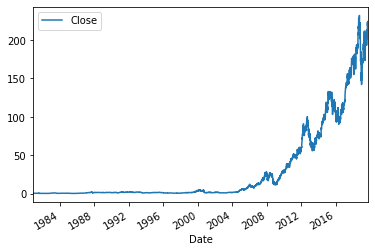

In [9]:
data.plot(y='Close')  #date is already implicitly defined as x-axis?

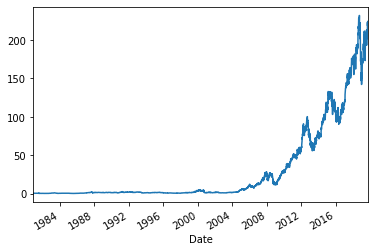

In [10]:
stock_c.plot()

## Q2

### Q2.1, Total how many trading days the stock price close at below 50 dollars ? (fill in the number in Camino)

In [11]:
# data[data['Close'] < 50] this boolean extracts portion of datafram where closing price is below 50

In [12]:
data[data['Close'] < 50].count()

Open         7682
High         7682
Low          7682
Close        7682
Adj Close    7682
Volume       7682
dtype: int64

There are 7682 trading days that satisfy this condition.

### Q2.2, When is the first time this stock close at more than 50 dollars? Show the date only. (choose the right date in Camino)

In [13]:
# data[data['Close'] > 50] This boolean extracts all trading days with the stock closing at more than 50

In [14]:
data[data['Close'] > 50].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-02-07,49.698570,50.464287,49.662857,50.268570,43.870049,121255400.0
2011-02-08,50.525715,50.788570,50.307144,50.742859,44.283970,95260200.0
2011-02-09,50.741428,51.285713,50.695713,51.165714,44.652996,120686300.0
2011-02-10,51.055714,51.428570,49.714287,50.648571,44.201687,232137500.0
2011-02-11,50.678570,51.114285,50.505714,50.978573,44.489674,91893200.0


Five head values represent the earliest dates. 2011-02-07 is the first date this condition occurs.

### Q2.3, Within the dates with price close at more than 50 dollars, find out how many days the trading volume is higher than 100 million shares. (choose the right number in Camino)

In [15]:
overfif = data[data['Close'] > 50] #represents boolean where closing price is more than fifty dollars

In [16]:
overfif[overfif['Volume'] > 100000000].head(10) 
#this nested boolean satisfies both conditions (closing at more than 50 and volume greater than 100 mill)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-02-07,49.698570,50.464287,49.662857,50.268570,43.870049,121255400.0
2011-02-09,50.741428,51.285713,50.695713,51.165714,44.652996,120686300.0
2011-02-10,51.055714,51.428570,49.714287,50.648571,44.201687,232137500.0
2011-02-16,51.542858,52.128571,51.500000,51.875713,45.272617,120289400.0
2011-02-17,51.035713,51.467144,50.931427,51.185715,44.670448,132645800.0
2011-02-18,51.244286,51.357143,49.931427,50.080002,43.705486,204014300.0
2011-02-28,50.177143,50.721428,50.160000,50.458572,44.035866,100768500.0
2011-03-02,49.994286,50.621429,49.771427,50.302856,43.899967,150647700.0
2011-03-03,51.027142,51.398571,50.845715,51.365715,44.827538,125197100.0


In [17]:
overfif[overfif['Volume'] > 100000000].count()

Open         404
High         404
Low          404
Close        404
Adj Close    404
Volume       404
dtype: int64

**404 trading days satisfy these conditions.**

## Q3

### Q3.1, For dates with price close at more than 100 dollars, how many days are before 2014-01-01 ? Show the date and stock price.  (choose the number of days in Camino)

In [18]:
# data[data['Close'] >100] days that close at more than 100

In [19]:
data[data['Close'] >100].loc[:'2014-01-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,99.982857,100.332855,99.488571,100.272858,87.885170,93375800.0
2012-09-19,100.037140,100.570000,99.938568,100.300003,87.908958,81718700.0
2012-09-21,100.344284,100.724289,99.908569,100.012856,87.657303,142897300.0


There are three days that satisfy these conditions. Listed above.

### Q3.2, Show the top 5 trading volume(date and volume) for stock price over 100 dollars. (choose the largest volume date in Camino)

In [20]:
data[data['Close']>100].sort_values(by='Volume',ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-24,94.870003,108.800003,92.000000,103.120003,96.240166,162206300.0
2015-01-28,117.629997,118.120003,115.309998,115.309998,106.266914,146477100.0
2012-09-21,100.344284,100.724289,99.908569,100.012856,87.657303,142897300.0
2015-08-21,110.430000,111.900002,105.650002,105.760002,98.704018,128275500.0
2015-08-04,117.419998,117.699997,113.250000,114.639999,106.509476,124138600.0


### Q3.3, Based on top 5 trading volume dates for stock price over 100 dollars, find the matching closing price and sort them based on price, highest one on top. (choose the first date in Camino)

In [21]:
top5 = data[data['Close']>100].sort_values(by='Volume',ascending = False).head() 

In [22]:
top5.sort_values(by='Close',ascending=False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-28,117.629997,118.120003,115.309998,115.309998,106.266914,146477100.0
2015-08-04,117.419998,117.699997,113.250000,114.639999,106.509476,124138600.0
2015-08-21,110.430000,111.900002,105.650002,105.760002,98.704018,128275500.0
2015-08-24,94.870003,108.800003,92.000000,103.120003,96.240166,162206300.0
2012-09-21,100.344284,100.724289,99.908569,100.012856,87.657303,142897300.0


### Q3.4, Based on top 5 trading volume dates for stock price over 100 dollars, which date it lost the most per share? (choose the date in Camino)

In [23]:
top5['Close'] - top5['Open']     #2015-08-21 has the biggest net loss

Date
2015-08-24    8.250000
2015-01-28   -2.319999
2012-09-21   -0.331428
2015-08-21   -4.669998
2015-08-04   -2.779999
dtype: float64

### Q-extra, (extra credit)  From the previous stock chart, we know this stock on average had been growing constantly till recent months. Let's pick stock closing price at 150 dollars as checkpoint.  Find out two dates that are closest(or equal) to 150(one should be before hitting the max, and the other is after hitting the max). Use these two dates to compare with the date that stock hit the max. What's the ratio between the days it took from 150 reached max and the days it took from max dropped back to 150. (pick the right ratio in Camino)

In [24]:
data['Close'].max()  #maximum stock closing price

232.07000699999998

In [25]:
data[data['Close'] == 232.07000699999998]   #max occurs on this date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-03,230.050003,233.470001,229.779999,232.070007,228.523819,28654800.0


**Now let's find a date before and after this date that's around 150 for closing price.**

In [26]:
data[(data['Close'] >= 150) & (data['Close'] < 151)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-17,153.600006,154.570007,149.710007,150.250000,145.180206,50767700.0
2017-07-18,149.199997,150.130005,148.669998,150.080002,145.015961,17868800.0
2017-07-20,151.500000,151.740005,150.190002,150.339996,145.267151,17243700.0
2017-07-21,149.990005,150.440002,148.880005,150.270004,145.199524,26252600.0
2017-07-27,153.750000,153.990005,147.300003,150.559998,145.479767,32476300.0
2017-08-01,149.100006,150.220001,148.410004,150.050003,144.986969,35368600.0
2017-09-25,149.990005,151.830002,149.160004,150.550003,146.041321,44387300.0
2018-12-21,156.860001,158.160004,149.630005,150.729996,148.944626,95744600.0
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.964386,41025300.0


In [27]:
data[(data['Close'] < 150) & (data['Close'] > 149)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,147.970001,149.330002,147.330002,149.039993,144.011017,20132100.0
2017-07-17,148.820007,150.899994,148.570007,149.559998,144.513474,23793500.0
2017-07-28,149.889999,150.229996,149.190002,149.500000,144.455536,17213700.0


Most of the 150 prices that lie before the max date are in July of 2017. The before value, for our purposes, is therefore **2017-08-01**. This is the closest value to 150 that is not actually 150.

For the date after the max, let's pick the date **2019-01-14**. This has a closing price of exactly $150.

Recall the date of our maximum value lies on **2018-10-03**.

In [28]:
import datetime
maxdate = "2018-10-03"
earlydate = "2017-08-01"
maxdate1 = datetime.datetime.strptime(maxdate, "%Y-%m-%d").date()
earlydate1 = datetime.datetime.strptime(earlydate, "%Y-%m-%d").date()
difference1 =  (maxdate1 - earlydate1).days

In [29]:
difference1

428

In [30]:
maxdate = "2018-10-03"
latedate="2019-01-14"
maxdate1 = datetime.datetime.strptime(maxdate, "%Y-%m-%d").date()
latedate1 = datetime.datetime.strptime(latedate, "%Y-%m-%d").date()
difference2 = (maxdate1 - latedate1).days

In [31]:
difference2 = difference2* (-1)  #its a negative, lets find its absolute value

In [32]:
difference2

103

In [33]:
difference1/difference2

4.155339805825243

This value about is our approximate ratio.